In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [ ]:
print(len(X_train))
print(len(X_test))

60000
10000


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

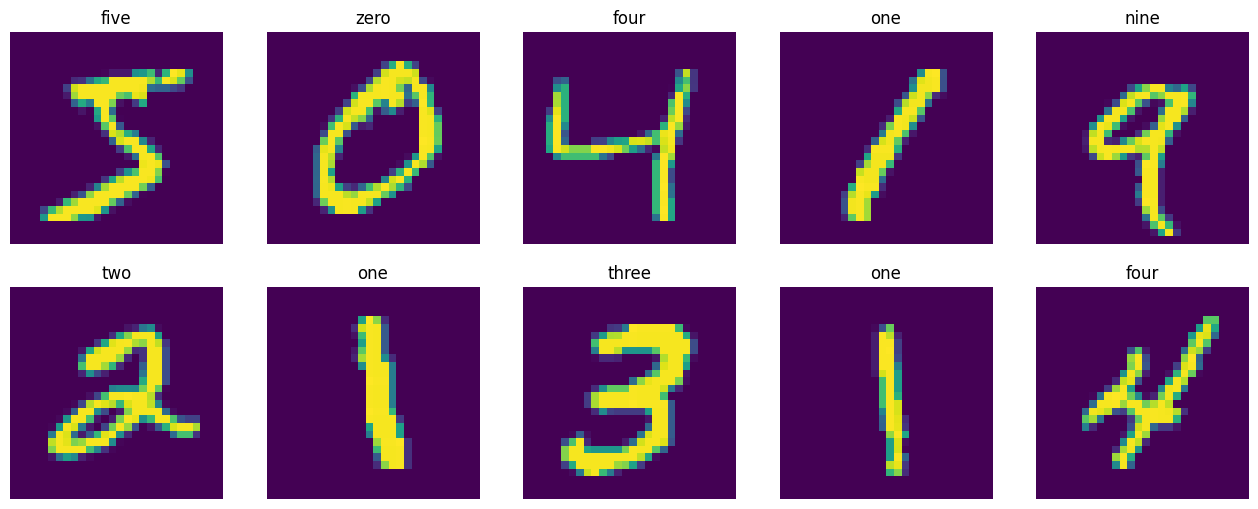

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in range(0,10):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title(class_names[y_train[i]])

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1), padding='same'))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3,3)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 128)        

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 53s 34ms/step - loss: 0.2242 - accuracy: 0.9288 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 2/30
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 0.0839 - val_accuracy: 0.9715
Epoch 3/30
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0579 - val_accuracy: 0.9827
Epoch 4/30
1500/1500 [==============================] - 52s 34ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0676 - val_accuracy: 0.9785
Epoch 5/30
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0488 - val_accuracy: 0.9849
Epoch 6/30
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0428 - val_accuracy: 0.9880
Epoch 7/30
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0374 -

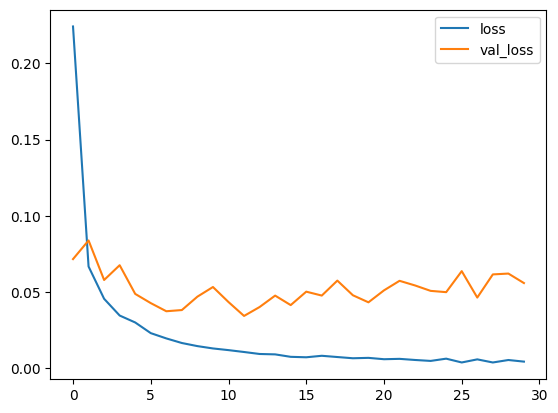

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

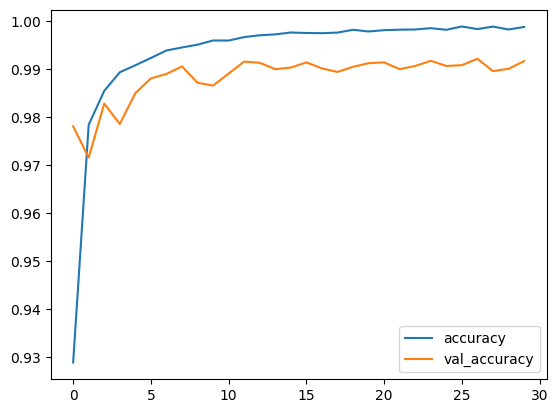

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
from tensorflow.keras.models import load_model, save_model

save_model(model, 'new_model.h5')


<ipython-input-41-d11dc7d580b0>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'new_model.h5')


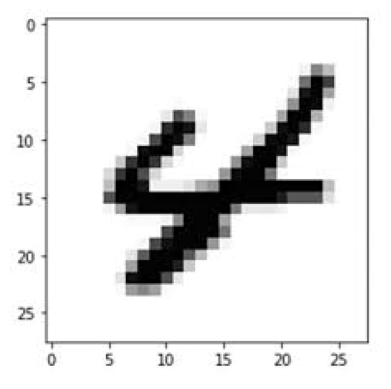

1/1 [==============================] - 0s 32ms/step
Predicted Digit: 0


In [ ]:
from PIL import Image

# Load the image and convert to grayscale
img = Image.open('/content/images (1).jpg').convert('L')

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Resize the image to 28x28 pixels
img = img.resize((28, 28))

# Convert the image to a numpy array and normalize pixel values
img_array = np.array(img) / 255.0

# Reshape the image for model input (add batch and channel dimensions)
img_array = img_array.reshape(1, 28, 28, 1)

# Make prediction
prediction = model.predict(img_array)

# Get the predicted digit
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)


In [ ]:
X_test = np.expand_dims(X_test,axis=-1)

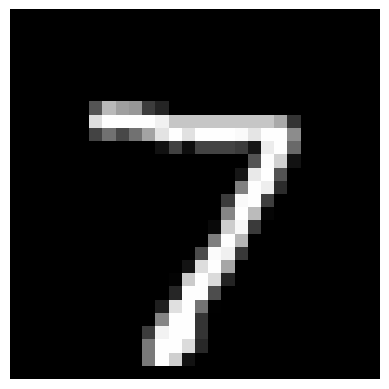

1/1 [==============================] - 0s 33ms/step
Predicted Label: 7


In [ ]:
index = 0  # Change this index to visualize different images

# Display the image from the test data
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

# Make prediction on the chosen image
prediction = model.predict(np.expand_dims(X_test[index], axis=0))
predicted_label = np.argmax(prediction)

print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 22ms/step


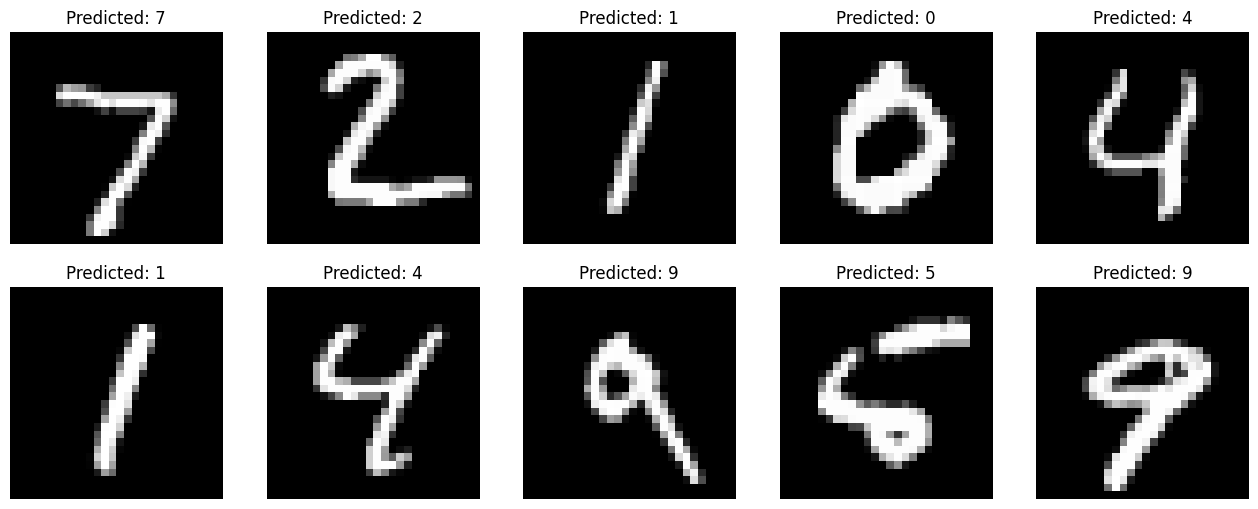

In [ ]:
plt.figure(figsize=(16, 16))
j = 1

for i in range(10):
    plt.subplot(5, 5, j)
    j += 1
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Display the image
    plt.axis('off')
    prediction = model.predict(np.expand_dims(X_test[i], axis=0))
    predicted_label = np.argmax(prediction)
    plt.title(f"Predicted: {predicted_label}")  # Add predicted label as title

plt.show()
